**IMPORT LIBRARIES**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

**IMPORT DATASET**

In [38]:
import pandas as pd
global_terrorism=pd.read_csv('globalterrorismdb_0718dist.csv',header=0,encoding='unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
global_terrorism

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75622,200305290001,2003,5,29,NaN,0,NaN,160,Philippines,5,Southeast Asia,North Cotabato,Carmen,7.199509,124.796982,1.0,0,NaN,"05/29/2003: Ten people, five civilians and fiv...",1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,7.0,Facility/Infrastructure Attack,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Philippine Military,"Two military outposts in Carmen, Philippines",...,NaN,NaN,Unspecified rockets and mortars were used in t...,10.0,0.0,5.0,NaN,0.0,NaN,1,3.0,Minor (likely < $1 million),NaN,Approximately 15 homes were burned in this inc...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Official says MILF 'separatists' kill five in...","""10 killed in fighting in the southern 

**DATA PREPROCESSING**

In [40]:
global_terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [41]:
global_terrorism.columns.str.strip()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
global_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Columns: 135 entries, eventid to related
dtypes: float64(74), int64(7), object(54)
memory usage: 14.7+ MB


In [42]:
global_terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.562700e+04,75627.000000,75627.000000,75627.000000,75627.000000,75627.000000,75627.000000,71815.000000,7.181400e+04,75626.000000,75627.000000,75627.000000,75627.000000,75627.000000,75627.000000,12011.000000,75627.000000,75627.000000,75627.00000,75627.000000,731.000000,39.000000,75627.000000,71988.000000,75162.000000,1712.000000,1460.000000,1598.000000,274.000000,228.000000,267.000000,75505.000000,307.000000,31.000000,75627.000000,12393.000000,8224.000000,9507.000000,1514.000000,187.000000,76.000000,27.000000,21.000000,1490.000000,75627.000000,63378.000000,4248.000000,3607.000000,539.000000,471.000000,69.000000,65.000000,69383.000000,11501.000000,10993.000000,66881.000000,11413.000000,10410.000000,75627.000000,21444.000000,1.023500e+04,75450.000000,4956.000000,4945.000000,1696.000000,1792.000000,68083.000000,8.080000e+02,1.080000e+02,2.870000e+02,104.000000,2387.000000,1981.000000,75627.000000,75627.000000,75626.000000,75626.000000
mean,1.988381e+11,1988.315086,6.441509,15.349954,0.024978,146.062848,5.871131,19.069307,-1.208453e+03,1.433528,0.047602,0.986685,0.989832,0.882172,-1.481640,1.278578,0.112380,0.914356,0.00476,3.109339,3.801642,5.282051,7.991366,45.817775,128.201086,9.357477,50.776027,148.838548,9.222628,54.956140,130.902622,0.065612,0.322476,0.290323,0.002486,36.609376,-12.608828,-0.210476,5.953104,0.112299,6.539474,0.740741,6.904762,-7.365772,6.516086,10.214301,6.585687,10.445245,6.753247,11.169851,6.318841,11.015385,2.290821,0.376228,0.389884,2.605149,0.262332,0.040538,0.552554,3.367749,7.440009e+05,0.062107,3.594431,-0.337917,-0.420991,-0.484933,-0.002541,3.348637e+06,3.340622e+05,7.500586e+05,1190.173077,3.806871,-9.156991,-3.775411,-3.732397,0.125221,-2.985851
std,7.447222e+08,7.447205,3.398264,8.817120,0.156059,136.375370,3.193166,23.889732,3.216115e+05,1.098906,0.236743,0.114622,0.100325,0.322407,3.567483,0.575512,0.315836,0.279840,0.06883,1.978646,2.142281,1.972825,6.788337,32.830390,83.821047,6.374226,29.073820,143.622170,6.153536,29.342243,105.417635,0.247603,0.468187,0.461414,0.049797,618.701029,34.035835,1.854077,3.542180,1.733046,3.858984,0.446576,3.793478,3.518697,2.297831,7.047488,1.910575,7.461176,2.114818,8.009623,1.519411,8.076765,12.466462,18.124121,3.989854,53.529970,9.521263,0.644440,1.345730,0.531432,3.025212e+07,0.306654,312.211049,7.903831,102.439754,122.083471,0.370915,3.663937e+07,1.212287e+06,3.515738e+06,6646.576296,1.949699,57.732298,4.504529,4.560913,0.788212,4.523471
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.983053e+11,1983.000000,3.000000,8.000000,

In [43]:
global_terrorism.shape

(75627, 135)

In [44]:
count1=global_terrorism.count().tail()

In [45]:
count1.head()

INT_LOG     75627
INT_IDEO    75627
INT_MISC    75626
INT_ANY     75626
related      8498
dtype: int64

**ANALYSIS OF MISSING DATA**

In [46]:
global_missing=global_terrorism.isna()
global_missing.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True


In [47]:
missing_data_per=global_terrorism.isnull().mean()*100
tot_missing_data=global_terrorism.isnull().sum().sort_values(ascending=False)
missing_data=pd.concat([tot_missing_data,missing_data_per],axis=1,keys=['Total', '%'])
missing_data


,Total,%
gsubname3,75626,99.998678
claimmode3,75606,99.972232
claimmode3_txt,75606,99.972232
gsubname2,75604,99.969588
claim3,75600,99.964298
...,...,...
success,0,0.000000
multiple,0,0.000000
doubtterr,0,0.000000
crit3,0,0.000000


**Plot of missing data**

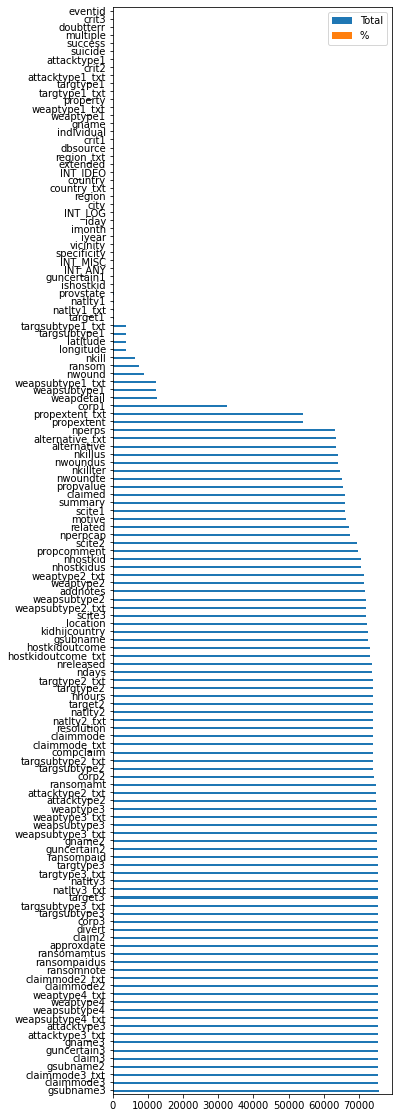

In [48]:
missing_data.plot(kind='barh',figsize=(5,20))

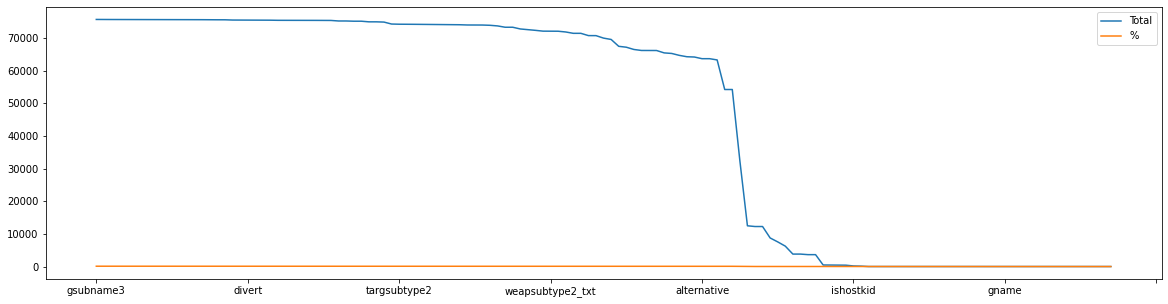

In [49]:
missing_data.plot(figsize=(20,5))

In [50]:
#choose the important columns required
df=pd.DataFrame(global_terrorism,columns=['eventid','iyear','imonth','iday','approxdate','extended','resolution','country','country_txt','region','region_txt','provstate','city','latitude','longitude','specificity','vicinity','location','summary','crit1'])

In [51]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75627 entries, 0 to 75626
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventid      75627 non-null  int64  
 1   iyear        75627 non-null  int64  
 2   imonth       75627 non-null  int64  
 3   iday         75627 non-null  int64  
 4   approxdate   183 non-null    object 
 5   extended     75627 non-null  int64  
 6   resolution   1530 non-null   object 
 7   country      75627 non-null  int64  
 8   country_txt  75627 non-null  object 
 9   region       75627 non-null  int64  
 10  region_txt   75627 non-null  object 
 11  provstate    75214 non-null  object 
 12  city         75627 non-null  object 
 13  latitude     71815 non-null  float64
 14  longitude    71814 non-null  float64
 15  specificity  75626 non-null  float64
 16  vicinity     75627 non-null  int64  
 17  location     3336 non-null   object 
 18  summary      9498 non-null   object 
 19  crit

In [53]:
#checking whether missing data is present
missing_data_per1=df.isnull().mean()*100
total_missing_data1=df.isnull().sum().sort_values(ascending=False)
missing_data1=pd.concat([total_missing_data1,missing_data_per1],axis=1,keys=['Total','%'])
missing_data1

,Total,%
approxdate,75444,99.758023
resolution,74097,97.976913
location,72291,95.588877
summary,66129,87.440993
longitude,3813,5.041850
latitude,3812,5.040528
provstate,413,0.546101
specificity,1,0.001322
crit1,0,0.000000
iyear,0,0.000000


In [54]:
#droping columns with higher NAN values
df=df.drop(['approxdate','location','resolution'],axis = 1)
df.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1


In [55]:
df[['provstate','summary']]=df[['provstate','summary']].fillna(value='0')

In [56]:
df[['eventid'	,'iyear','imonth',	'iday',	'extended',	'country',	'country_txt',	'region',	'region_txt',
    'city',	'latitude',	'longitude',	'specificity',	'vicinity'	,'crit1']]=df[['eventid'	,'iyear','imonth',	'iday',	'extended',	'country',	'country_txt',	'region',	'region_txt',	'city',	'latitude',	'longitude',	'specificity',	'vicinity'	,'crit1']].fillna(value=0)
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1.0,0,0,1
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,0,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,0,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,0,1


In [57]:
df.isnull()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75622,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75623,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75624,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
df['iyear'].count

<bound method Series.count of 0        1970
1        1970
2        1970
3        1970
4        1970
         ... 
75622    2003
75623    2003
75624    2003
75625    2003
75626    2003
Name: iyear, Length: 75627, dtype: int64>

In [59]:
df['region_txt'].count

<bound method Series.count of 0        Central America & Caribbean
1                      North America
2                     Southeast Asia
3                     Western Europe
4                          East Asia
                    ...             
75622                 Southeast Asia
75623             Sub-Saharan Africa
75624                 Eastern Europe
75625                     South Asia
75626                 Western Europe
Name: region_txt, Length: 75627, dtype: object>

In [60]:
df['country_txt'].count

<bound method Series.count of 0        Dominican Republic
1                    Mexico
2               Philippines
3                    Greece
4                     Japan
                ...        
75622           Philippines
75623                Uganda
75624                Russia
75625                 India
75626                 Spain
Name: country_txt, Length: 75627, dtype: object>

In [61]:
df['region_txt']=df['region_txt'].str.replace('&','')
df['region_txt']

0        Central America  Caribbean
1                     North America
2                    Southeast Asia
3                    Western Europe
4                         East Asia
                    ...            
75622                Southeast Asia
75623            Sub-Saharan Africa
75624                Eastern Europe
75625                    South Asia
75626                Western Europe
Name: region_txt, Length: 75627, dtype: object

In [62]:
df['country_txt']=df['country_txt'].str.replace('&','')
df['country_txt']

0        Dominican Republic
1                    Mexico
2               Philippines
3                    Greece
4                     Japan
                ...        
75622           Philippines
75623                Uganda
75624                Russia
75625                 India
75626                 Spain
Name: country_txt, Length: 75627, dtype: object

In [63]:
df.country_txt.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

**Label encoding for categorical data**

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country_txt']=le.fit_transform(df['country_txt'])
df['country_txt']

0         46
1        115
2        139
3         67
4         89
        ... 
75622    139
75623    182
75624    146
75625     79
75626    163
Name: country_txt, Length: 75627, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region_txt']=le.fit_transform(df['region_txt'])
df['region_txt']

0         1
1         6
2         9
3        11
4         3
         ..
75622     9
75623    10
75624     4
75625     8
75626    11
Name: region_txt, Length: 75627, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['provstate']=le.fit_transform(df['provstate'])
df['provstate']

0           0
1         632
2        1881
3         146
4         655
         ... 
75622    1362
75623    1388
75624     420
75625     849
75626    1321
Name: provstate, Length: 75627, dtype: int64

**Assassination Attack type**

In [67]:
analyse_dataset=global_terrorism[global_terrorism['attacktype1_txt'].str.contains("Assassination")]

In [68]:
analyse_dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,Central America & Caribbean,Guatemala,Guatemala City,14.622869,-90.529068,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,British consulate,"Bodyguard, British Consul",...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
111,197003050003,1970,3,5,NaN,0,NaN,217,United States,1,North America,Puerto Rico,San Juan,18.386932,-66.061127,1.0,0,NaN,3/5/1970: Unknown Puerto Rican Nationalists as...,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",US Navy,Two members of the United States Navy,...,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conflicting reports attribute the incident to ...,Committee on the Judiciary United States Sena...,"William Sater, ""Puerto Rican Terrorists: A Pos...","""Toward People's War for Independence and Soci...",Hewitt Project,0,1,0.0,1.0,NaN


In [69]:
analyse_dataset.shape

(12722, 135)

In [70]:
analyse_dataset.groupby("country_txt").size().sort_values(ascending=False)

country_txt
United Kingdom    1646
Colombia          1257
Peru               994
India              867
Spain              598
                  ... 
Kyrgyzstan           1
Comoros              1
Latvia               1
Denmark              1
Cuba                 1
Length: 165, dtype: int64

**Country with higher Assassination rate**

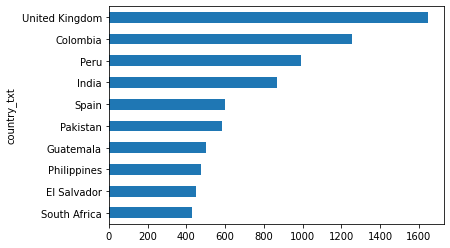

In [71]:
analyse_dataset.groupby("country_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

In [72]:
analyse_dataset.groupby("region_txt").size().sort_values(ascending=False)

region_txt
Western Europe                 2903
South America                  2626
Middle East & North Africa     2071
South Asia                     1941
Central America & Caribbean    1237
Sub-Saharan Africa              762
Southeast Asia                  562
North America                   221
Eastern Europe                  217
Central Asia                     95
East Asia                        51
Australasia & Oceania            36
dtype: int64

**Region with higher Assassination rate**

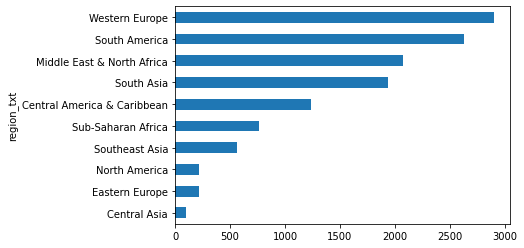

In [73]:
analyse_dataset.groupby("region_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

**Month with highest Assassination rate**

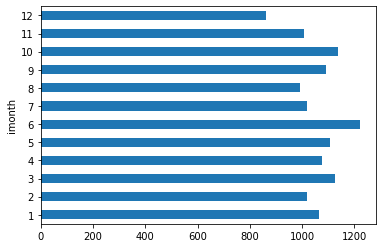

In [74]:
analyse_dataset.groupby("imonth").size().plot(kind="barh")

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['city']=le.fit_transform(df['city'])
df['city']

0        12315
1         8826
2        14028
3          844
4         4681
         ...  
75622     2487
75623     5223
75624     5122
75625    13524
75626    12201
Name: city, Length: 75627, dtype: int64

**MODEL CREATION**

In [76]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
X=df.iloc[:,0:10]
Y=df.iloc[:,10]

In [77]:
X

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate
0,197000000001,1970,7,2,0,58,46,2,1,0
1,197000000002,1970,0,0,0,130,115,1,6,632
2,197001000001,1970,1,0,0,160,139,5,9,1881
3,197001000002,1970,1,0,0,78,67,8,11,146
4,197001000003,1970,1,0,0,101,89,4,3,655
...,...,...,...,...,...,...,...,...,...,...
75622,200305290001,2003,5,29,0,160,139,5,9,1362
75623,200305290002,2003,5,29,0,213,182,11,10,1388
75624,200305300001,2003,5,30,0,167,146,9,4,420
75625,200305300002,2003,5,30,0,92,79,6,8,849


In [78]:
Y

0        12315
1         8826
2        14028
3          844
4         4681
         ...  
75622     2487
75623     5223
75624     5122
75625    13524
75626    12201
Name: city, Length: 75627, dtype: int64

In [79]:
X.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
extended       int64
country        int64
country_txt    int64
region         int64
region_txt     int64
provstate      int64
dtype: object

In [80]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=66)




In [81]:
X_train

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate
11240,198006180004,1980,6,18,0,185,163,8,11,1999
67405,199712200001,1997,12,20,0,104,92,11,10,1406
27928,198604230015,1986,4,23,0,45,34,3,7,92
49511,199112190015,1991,12,19,0,92,79,6,8,1134
19421,198308000007,1983,8,0,0,145,127,2,1,1618
...,...,...,...,...,...,...,...,...,...,...
5199,197708230006,1977,8,23,0,217,186,1,6,349
50893,199204020014,1992,4,2,0,6,2,10,5,1978
62586,199606050007,1996,6,5,0,604,199,11,10,1366
8243,197905020019,1979,5,2,0,65,55,11,10,1914


In [82]:
x_test

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate
13928,198107210005,1981,7,21,0,183,158,11,10,663
10195,198002100007,1980,2,10,0,209,180,10,5,839
70935,200009040012,2000,9,4,0,45,34,3,7,92
711,197102110001,1971,2,11,1,222,191,3,7,366
18869,198305240010,1983,5,24,0,603,185,8,11,1391
...,...,...,...,...,...,...,...,...,...,...
11879,198009160008,1980,9,16,0,78,67,8,11,146
17055,198209200007,1982,9,20,0,217,186,1,6,1337
1602,197210250002,1972,10,25,0,217,186,1,6,2032
14270,198108310012,1981,8,31,0,83,70,2,1,1582


In [83]:
y_train

11240     6079
67405     6846
27928     2891
49511     9353
19421     9084
         ...  
5199      5526
50893     8078
62586     2091
8243       284
8823     14028
Name: city, Length: 56720, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred=logistic_reg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.09513395297977037


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.6036085292509568


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([ 617, 1386, 1110, ...,  182,  163,  379])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.5899398578458174
